In [32]:
import scipy.stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
data = scipy.stats.norm.rvs(size=10000, loc=0, scale=1,random_state=123)

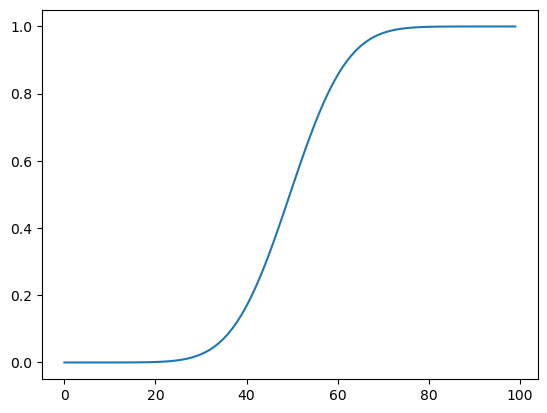

In [33]:
#функция распределения нормального распределения
plt.plot([norm.cdf(x) for x in np.linspace(-5, 5, 100)])

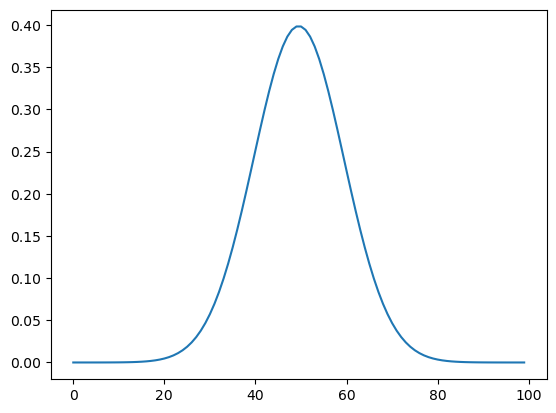

In [34]:
#плотность нормального распределения
plt.plot([norm.pdf(x) for x in np.linspace(-5, 5, 100)])

In [35]:
#сгенерируем данные
data = scipy.stats.norm.rvs(size=10000, loc=0, scale=1,
                            random_state=123)

In [36]:
def calculate_proba(samples, dist, num_points, eps, plot=False):
    x_li = np.linspace(-3, 3, num_points)
    #Разбиваем интервал на котором находится плотность на num_points точек:
    proba = 0
    dif = x_li[1] - x_li[0]
    sdf_li = []
    for x in x_li:
        #Считаем значение выборочной функции распределения в точке:
        
        sdf_x = (samples < x).sum()/len(samples)
        #Если значение |F_n(x) - F(x)| > eps, то учитываем это в итоговой вероятности
        if abs(sdf_x - dist.cdf(x)) > eps:
            proba += dif*dist.pdf(x + dif/2)
        sdf_li.append(sdf_x)
        if plot:
            plt.plot(sdf_li)
    return proba

0.9643705367352947

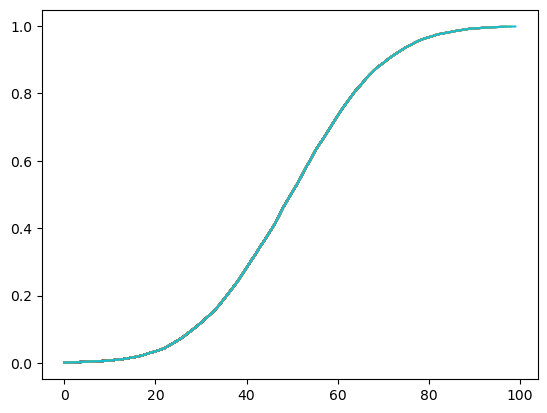

In [37]:
calculate_proba(data, norm, 100, 0.0001, plot = True)
#Рисуется выборочная функция распределения, значение вызова функции -- вероятность

Зафиксируем достаточно маленький eps и проверим стремление к нулю события P(|F_n(x) - F(x)| < eps)

In [38]:
data = scipy.stats.norm.rvs(size=100, loc=0, scale=1,
                            random_state=123)

eps = 0.0005
size = 0
eps_li = [1]

while eps_li[-1] > 10 ** -9:
    size += 10000
    data = scipy.stats.norm.rvs(size=size, loc=0, scale=1,
                            random_state=123)
    res = calculate_proba(data, norm, 100, eps, plot = False)
    eps_li.append(res)

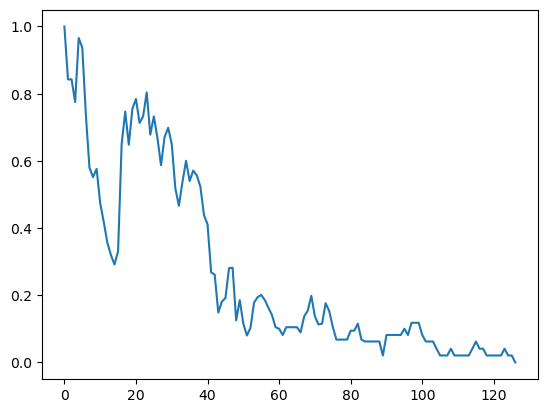

In [39]:
plt.plot(eps_li)

Видно, что вероятность события действительно стремится к нулю